Explore the data.
Use publication information (abstracts titles etc.) to add what features seem useful

In [24]:
#All imports
import pandas as pd
import pickle
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import statsmodels.api as sm
import sklearn

In [25]:
df = pd.read_pickle('HealthgradesNymagClean.pkl')
df.head()

,aboutMe,address.line1,address.line2,affiliatedHospitalIDs,age,gender,isRecommendedProvider,payorCount,premiumDisplayOasLabel,providerSponsorships,specialistDesc,surveyOverallRatingPercent,surveyOverallRatingScore,surveyStarRatingScore,surveyUserCount,yearsSinceGraduation,isbest,Number_pub
fullname,,,,,,,,,,,,,,,,,,
Sylvia Adams,"Dr. Sylvia Adams, MD is an Oncology Specialist...",160 E 34th St Fl 4,"New York, NY 10016",[HGST7FF97B36330214],48.0,F,True,0,call,NaN,"[Oncology Specialist, Hematology Specialist, I...",96.0,10.0,10.0,36.0,23.0,False,36
Morton Coleman,"Dr. Morton Coleman, MD is a Hematology Special...",407 E 70th St Fl 3,"New York, NY 10021",[HGST750A7B36330101],78.0,M,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",96.0,10.0,10.0,16.0,55.0,False,90
Karen Haglof,"Dr. Karen Haglof, MD is a Hematology Specialis...",157 E 32nd St Fl 2,"New York, NY 10016",[HGST7FF97B36330214],62.0,F,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",88.0,9.0,9.0,14.0,19.0,False,1
Michael Grossbard,Dr. Grossbard is the Director of the Hematolog...,240 E 38th St Fl 19,"New York, NY 10016",[HGST7FF97B36330214],57.0,M,False,0,static,NaN,"[Oncology Specialist, Hematology Specialist, I...",70.0,7.0,7.0,10.0,32.0,True,39
Jeffrey Tepler,"Dr. Jeffrey Tepler, MD is a Hematology Special...",310 E 72nd St Fl 1,"New York, NY 10021",[HGST750A7B36330101],60.0,M,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",100.0,10.0,10.0,8.0,36.0,False,1


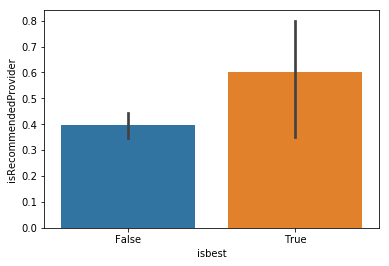

In [26]:
#Explore features to see which ones are informative
#Is there a difference in isRecommendedProvider of doctors (Yes)
sns.barplot(x = df.isbest, y = df.isRecommendedProvider)

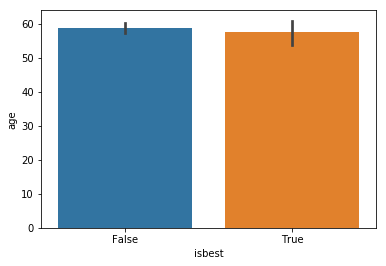

In [27]:
#Is there a difference in age of doctors (NO)
sns.barplot(x = df.isbest, y = df.age)

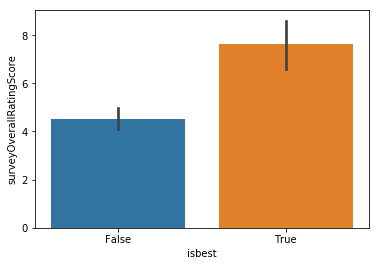

In [28]:
#Is there a difference in surveyOverallRatingScore of doctors (Yes)
sns.barplot(x = df.isbest, y = df.surveyOverallRatingScore)

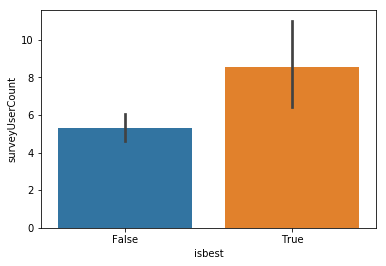

In [29]:
#Is there a difference in surveyUserCount of doctors (Yes), seems related to previous
sns.barplot(x = df.isbest, y = df.surveyUserCount)

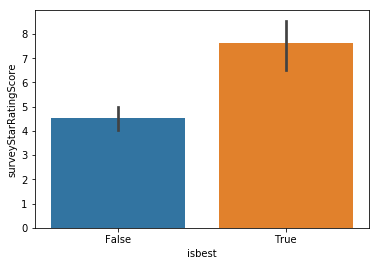

In [30]:
#is there a difference in surveyStarRatingScore
sns.barplot(x = df.isbest, y = df.surveyStarRatingScore)
#this is probably correlated to other survey metrics, so should check for correlations

Number of nan = 0


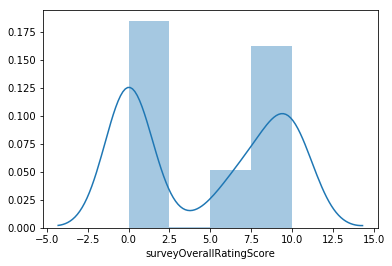

In [31]:
#plot overall ratings and count nan
countnan = 0
ratings = []
for rating in df.surveyOverallRatingScore:
    if pd.isnull(rating): countnan+=1
    else:ratings.append(rating)
ratings = pd.Series(ratings, name = 'surveyOverallRatingScore')
sns.distplot(ratings)
print('Number of nan = '+ str(countnan))
#the 0 ratings are probably converted from nan for other columns. This may be useful to include in the fit

Number of nan = 175


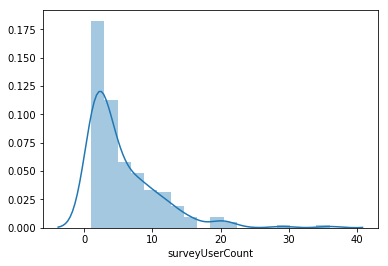

In [32]:
#plot overall surveyUserCount and count nan since this showed difference between "is best" and not"
countnan = 0
ratings = []
for rating in df.surveyUserCount:
    if pd.isnull(rating): countnan+=1
    else:ratings.append(rating)
ratings = pd.Series(ratings, name = 'surveyUserCount')
sns.distplot(ratings)
print('Number of nan = '+ str(countnan))
#too many nan will not use

Number of nan = 0


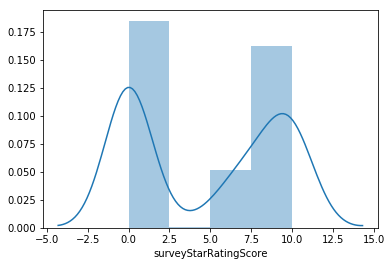

In [33]:
#plot overall surveyStarRatingScore and count nan
countnan = 0
ratings = []
for rating in df.surveyStarRatingScore:
    if pd.isnull(rating): countnan+=1
    else:ratings.append(rating)
ratings = pd.Series(ratings, name = 'surveyStarRatingScore')
sns.distplot(ratings)
print('Number of nan = '+ str(countnan))
#no nan, check for correlations

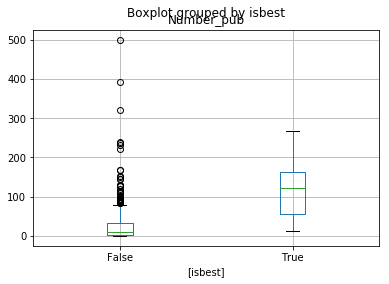

In [47]:
#check distribution of number of publications (the 500 number is probably a mistake)
#this already suggests we need more features
boxplot = df.boxplot(column=['Number_pub'], by=['isbest'])


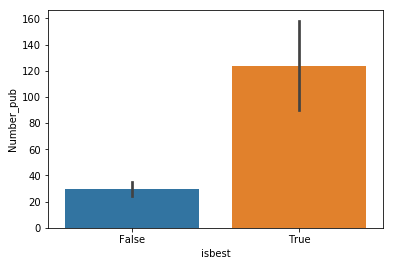

In [48]:
#check number of publications, this is from pubmed and not healthgrades
sns.barplot(x = df.isbest, y = df.Number_pub)

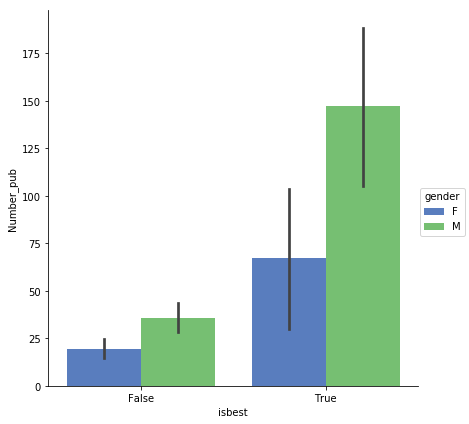

In [36]:
#check gender
sns.factorplot(x="isbest", y="Number_pub",hue = 'gender', data=df, size=6, kind="bar", palette="muted")

So far interesting columns seem to be: surveyStarRatingScore, surveyOverallRatingScore, number_pub, isRecommendedProvider

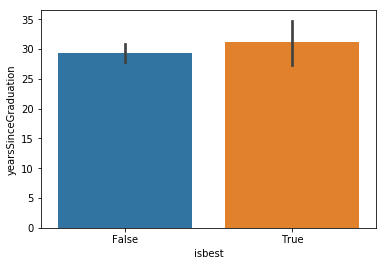

In [49]:
#is there a relation in years since graduation (no)
sns.barplot(x = df.isbest, y = df.yearsSinceGraduation)

So far interesting columns seem to be: surveyStarRatingScore, surveyOverallRatingScore, number_pub, isRecommendedProvider

In [50]:
#create new df with only relevant columns. check for correlations
columnnames = []
for columnname in df: columnnames.append(columnname)
del(columnnames[-2:])
del(columnnames[-5:-3])
del(columnnames[6])
columnnames

['aboutMe',
 'address.line1',
 'address.line2',
 'affiliatedHospitalIDs',
 'age',
 'gender',
 'payorCount',
 'premiumDisplayOasLabel',
 'providerSponsorships',
 'specialistDesc',
 'surveyStarRatingScore',
 'surveyUserCount',
 'yearsSinceGraduation']

In [51]:
df_tofit = df.drop(columns = columnnames)

In [52]:
df_toplot = df_tofit.drop(columns = ['isbest','isRecommendedProvider'])

/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  from ipykernel import kernelapp as app


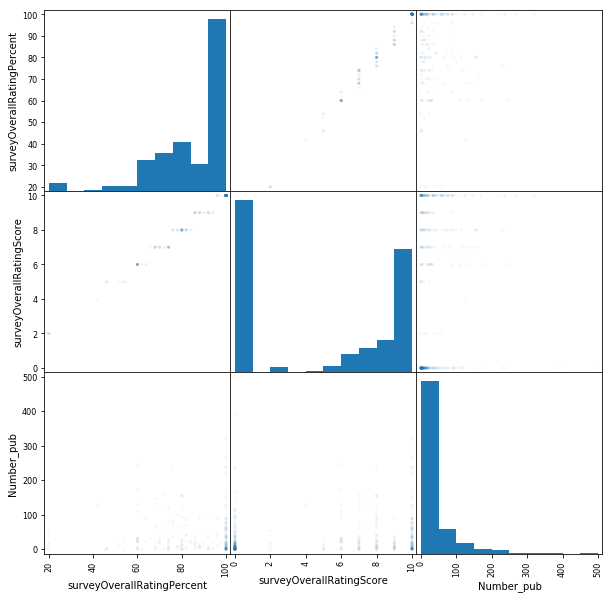

In [54]:
#check for correlations
a = pd.scatter_matrix(df_toplot,alpha=0.05,figsize=(10,10), diagonal='hist')